In [2]:
import numpy as np
import nilearn
from nilearn import plotting
import scipy.io as sio
from scipy.optimize import linear_sum_assignment
from scipy.spatial import distance
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib
from matplotlib import pyplot as plt

In [4]:
#calculate cost between all ROIs

#load FC matrices
fc=sio.loadmat('/Users/emilyolafson/Documents/Thesis/SUB1_23_data/FCprecision.mat')
nsess=sio.loadmat('/Users/emilyolafson/Documents/Thesis/SUB1_23_data/num_visits.mat')

fc=fc['partialcorr']
nsess=nsess['nsess']
allsubs_S1S2=list()
allsubs_nopenalty_S1S2=list()

#calculate cost between all ROIs
#between time point 1 and 2
for i in range(0,23): #subject 
    sub=np.zeros((268,268))
    sub_nopenalty=np.zeros((268,268))
    for x in range(0,268): #x = time point 1.
        a=fc[i,0][x]
        for y in range(0,268): #y = time point 2.
            b=fc[i,1][y]
           # print(abs(x-y))
            if (x!=y):
                sub[x,y]=distance.euclidean(a,b)+0.3
                sub_nopenalty[x,y]=distance.euclidean(a,b)
            else:
                sub[x,y]=distance.euclidean(a,b)
                sub_nopenalty[x,y]=distance.euclidean(a,b)

    allsubs_S1S2.append(sub)
    allsubs_nopenalty_S1S2.append(sub_nopenalty)
    

In [5]:
#between time point 2 and 3
allsubs_S2S3=list()
allsubs_nopenalty_S2S3=list()

for i in range(0,23): #subject 
    if i==19:
        continue
    sub=np.zeros((268,268))
    sub_nopenalty=np.zeros((268,268))
    for x in range(0,268): #x = time point 1.
        a=fc[i,1][x]
        for y in range(0,268): #y = time point 2.
            b=fc[i,2][y]
           # print(abs(x-y))
            if (x!=y):
                sub[x,y]=distance.euclidean(a,b)+0.3
                sub_nopenalty[x,y]=distance.euclidean(a,b)
            else:
                sub[x,y]=distance.euclidean(a,b)
                sub_nopenalty[x,y]=distance.euclidean(a,b)

    allsubs_S2S3.append(sub)
    allsubs_nopenalty_S2S3.append(sub_nopenalty)

In [6]:
#between time point 3 and 4
allsubs_S3S4=list()
allsubs_nopenalty_S3S4=list()

for i in range(0,23): #subject 
    if i==19 or i==11:
        continue
    sub=np.zeros((268,268))
    sub_nopenalty=np.zeros((268,268))
    for x in range(0,268): #x = time point 1.
        a=fc[i,2][x]
        for y in range(0,268): #y = time point 2.
            b=fc[i,3][y]
           # print(abs(x-y))
            if (x!=y):
                sub[x,y]=distance.euclidean(a,b)+0.3
                sub_nopenalty[x,y]=distance.euclidean(a,b)
            else:
                sub[x,y]=distance.euclidean(a,b)
                sub_nopenalty[x,y]=distance.euclidean(a,b)

    allsubs_S3S4.append(sub)
    allsubs_nopenalty_S3S4.append(sub_nopenalty)

In [7]:
#between time point 4 and 5
allsubs_S4S5=list()
allsubs_nopenalty_S4S5=list()

for i in range(0,23): #subject 
    if i==19 or i==11 or i==5:
        continue
    sub=np.zeros((268,268))
    sub_nopenalty=np.zeros((268,268))
    for x in range(0,268): #x = time point 1.
        a=fc[i,3][x]
        for y in range(0,268): #y = time point 2.
            b=fc[i,4][y]
           # print(abs(x-y))
            if (x!=y):
                sub[x,y]=distance.euclidean(a,b)+0.3
                sub_nopenalty[x,y]=distance.euclidean(a,b)
            else:
                sub[x,y]=distance.euclidean(a,b)
                sub_nopenalty[x,y]=distance.euclidean(a,b)

    allsubs_S4S5.append(sub)
    allsubs_nopenalty_S4S5.append(sub_nopenalty)

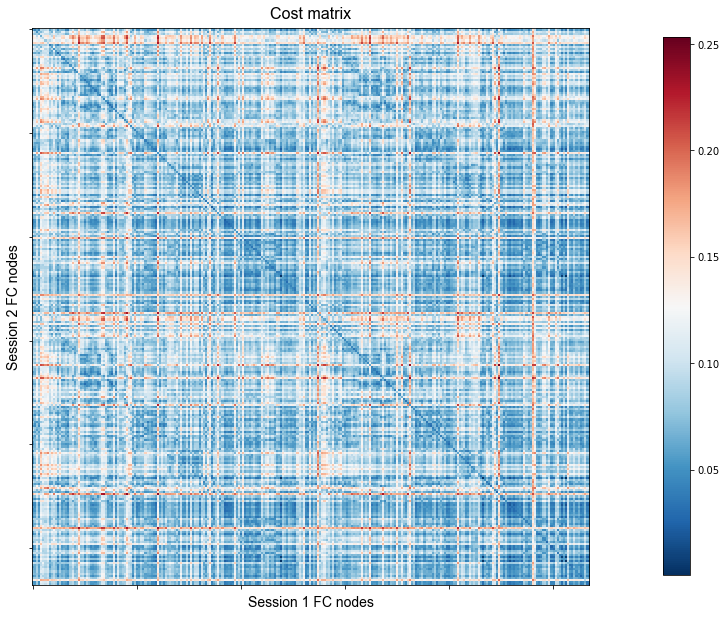

In [10]:
title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'14'}


fig = plt.figure(figsize=(10, 10))
plt.ylabel("Session 2 FC nodes", **axis_font)
plt.xlabel("Session 1 FC nodes", **axis_font)
plt.title("Cost matrix", **title_font)

#plotting.plot_matrix(allsubs_nopenalty_S2S3[13], figure=fig)
plotting.plot_matrix(allsubs_nopenalty_S1S2[12], figure=fig)


In [11]:
rows=np.zeros((23,268))
cols=np.zeros((23,268))
roichanges=np.zeros((23,268))
truecols=range(0,268)

for i in range(0,23):
    cost=allsubs_nopenalty_S1S2[i]
    rowind, colind= linear_sum_assignment(cost)
    rows[i]=rowind
    cols[i]=colind
    
np.savetxt('/Users/emilyolafson/Documents/Thesis/graph_matching/jupyter_output/partial_corr/stroke/cols_nopenalty_S1S2.txt', cols)
    
for j in range(0,23):
    for i in range(0,268):
        if cols[j][i]!=truecols[i]:
            roichanges[j][i]=1 #indices which are switched
    
allchanges=np.mean(roichanges,0)
#print(allchanges)

cvals=allchanges/0.35
viridis = cm.get_cmap('viridis', 268)
color_list = viridis(cvals)
#a=plotting.view_markers(node_coords, marker_size=allchanges*100, marker_color=color_list) 
#a.open_in_browser()
np.savetxt('/Users/emilyolafson/Documents/Thesis/graph_matching/jupyter_output/partial_corr/stroke/roichanges_nopenalty_S1S2.txt', allchanges)


In [12]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~PENALTY~~~~~~~~~~~~~~~~~~~~~~~~~~~~

rows=np.zeros((23,268))
cols=np.zeros((23,268))
roichanges=np.zeros((23,268))
truecols=range(0,268)

for i in range(0,23):
    cost=allsubs_S1S2[i]
    rowind, colind= linear_sum_assignment(cost)
    rows[i]=rowind
    cols[i]=colind
    
np.savetxt('/Users/emilyolafson/Documents/Thesis/graph_matching/jupyter_output/partial_corr/stroke/penalty/cols_S1S2.txt', cols)
    
for j in range(0,23):
    for i in range(0,268):
        if cols[j][i]!=truecols[i]:
            roichanges[j][i]=1 #indices which are switched
    
allchanges=np.mean(roichanges,0)
#print(allchanges)

cvals=allchanges/0.35
viridis = cm.get_cmap('viridis', 268)
color_list = viridis(cvals)
#a=plotting.view_markers(node_coords, marker_size=allchanges*100, marker_color=color_list) 
#a.open_in_browser()
np.savetxt('/Users/emilyolafson/Documents/Thesis/graph_matching/jupyter_output/partial_corr/stroke/penalty/roichanges_S1S2.txt', allchanges)


In [17]:
rows=np.zeros((22,268))
cols=np.zeros((22,268))
roichanges=np.zeros((22,268))

for i in range(0,22):
    cost= allsubs_nopenalty_S1S2[i]
    rowind, colind= linear_sum_assignment(cost)
    rows[i]=rowind
    cols[i]=colind


np.savetxt('/Users/emilyolafson/Documents/Thesis/graph_matching/jupyter_output/partial_corr/stroke/cols_nopenalty_S2S3.txt', cols)

for j in range(0,22):
    for i in range(0,268):
        if cols[j][i]!=truecols[i]:
            roichanges[j][i]=1 #indices which are switched
    

print(cols.shape)
allchanges=np.mean(roichanges,0)
#print(allchanges)

#cvals=allchanges/0.35
#viridis = cm.get_cmap('viridis', 268)
#color_list = viridis(cvals)
#a=plotting.view_markers(node_coords, marker_size=allchanges*100, marker_color=color_list) 
#a.open_in_browser()
np.savetxt('/Users/emilyolafson/Documents/Thesis/graph_matching/jupyter_output/partial_corr/stroke/roichanges_nopenalty_S2S3.txt', allchanges)



(22, 268)


In [8]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~PENALTY~~~~~~~~~~~~~~~~~~~~~~~~~~~~

rows=np.zeros((22,268))
cols=np.zeros((22,268))
roichanges=np.zeros((22,268))

for i in range(0,22):
    cost=allsubs_S2S3[i]
    rowind, colind= linear_sum_assignment(cost)
    rows[i]=rowind
    cols[i]=colind


np.savetxt('/Users/emilyolafson/Documents/Thesis/graph_matching/jupyter_output/partial_corr/stroke/penalty/cols_S2S3.txt', cols)

for j in range(0,22):
    for i in range(0,268):
        if cols[j][i]!=truecols[i]:
            roichanges[j][i]=1 #indices which are switched
    

print(cols.shape)
allchanges=np.mean(roichanges,0)
#print(allchanges)

#cvals=allchanges/0.35
#viridis = cm.get_cmap('viridis', 268)
#color_list = viridis(cvals)
#a=plotting.view_markers(node_coords, marker_size=allchanges*100, marker_color=color_list) 
#a.open_in_browser()
np.savetxt('/Users/emilyolafson/Documents/Thesis/graph_matching/jupyter_output/partial_corr/stroke/penalty/roichanges_S2S3.txt', allchanges)



(22, 268)


In [14]:
rows=np.zeros((21,268))
cols=np.zeros((21,268))
roichanges=np.zeros((21,268))

for i in range(0,21):
    cost=allsubs_nopenalty_S3S4[i]
    rowind, colind= linear_sum_assignment(cost)
    rows[i]=rowind
    cols[i]=colind
    
np.savetxt('/Users/emilyolafson/Documents/Thesis/graph_matching/jupyter_output/partial_corr/stroke/cols_nopenalty_S3S4.txt', cols)

for j in range(0,21):
    for i in range(0,268):
        if cols[j][i]!=truecols[i]:
            roichanges[j][i]=1 #indices which are switched
    

print(roichanges.shape)
allchanges=np.mean(roichanges,0)
#print(allchanges)

cvals=allchanges/0.35
viridis = cm.get_cmap('viridis', 268)
color_list = viridis(cvals)
##a=plotting.view_markers(node_coords, marker_size=allchanges*100, marker_color=color_list) 
#a.open_in_browser()
np.savetxt('/Users/emilyolafson/Documents/Thesis/graph_matching/jupyter_output/partial_corr/stroke/roichanges_nopenalty_S3S4.txt', allchanges)

(21, 268)


In [10]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~PENALTY~~~~~~~~~~~~~~~~~~~~~~~~~~~~

rows=np.zeros((21,268))
cols=np.zeros((21,268))
roichanges=np.zeros((21,268))

for i in range(0,21):
    cost=allsubs_S3S4[i]
    rowind, colind= linear_sum_assignment(cost)
    rows[i]=rowind
    cols[i]=colind
    
np.savetxt('/Users/emilyolafson/Documents/Thesis/graph_matching/jupyter_output/partial_corr/stroke/penalty/cols_S3S4.txt', cols)

for j in range(0,21):
    for i in range(0,268):
        if cols[j][i]!=truecols[i]:
            roichanges[j][i]=1 #indices which are switched
    

print(roichanges.shape)
allchanges=np.mean(roichanges,0)
#print(allchanges)

cvals=allchanges/0.35
viridis = cm.get_cmap('viridis', 268)
color_list = viridis(cvals)
##a=plotting.view_markers(node_coords, marker_size=allchanges*100, marker_color=color_list) 
#a.open_in_browser()
np.savetxt('/Users/emilyolafson/Documents/Thesis/graph_matching/jupyter_output/partial_corr/stroke/penalty/roichanges_S3S4.txt', allchanges)

(21, 268)


In [15]:
rows=np.zeros((20,268))
cols=np.zeros((20,268))
roichanges=np.zeros((20,268))

for i in range(0,20):
    cost=allsubs_nopenalty_S4S5[i]
    rowind, colind= linear_sum_assignment(cost)
    rows[i]=rowind
    cols[i]=colind
    
np.savetxt('/Users/emilyolafson/Documents/Thesis/graph_matching/jupyter_output/partial_corr/stroke/cols_nopenalty_S4S5.txt', cols)


for j in range(0,20):
    for i in range(0,268):
        if cols[j][i]!=truecols[i]:
            roichanges[j][i]=1 #indices which are switched

print(roichanges.shape)
allchanges=np.mean(roichanges,0)
#print(allchanges)

cvals=allchanges/0.35
viridis = cm.get_cmap('viridis', 268)
color_list = viridis(cvals)
#a=plotting.view_markers(node_coords, marker_size=allchanges*100, marker_color=color_list) 
#a.open_in_browser()
np.savetxt('/Users/emilyolafson/Documents/Thesis/graph_matching/jupyter_output/partial_corr/stroke/roichanges_nopenalty_S4S5.txt', allchanges)

(20, 268)


In [12]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~PENALTY~~~~~~~~~~~~~~~~~~~~~~~~~~~~

rows=np.zeros((20,268))
cols=np.zeros((20,268))
roichanges=np.zeros((20,268))

for i in range(0,20):
    cost=allsubs_S4S5[i]
    rowind, colind= linear_sum_assignment(cost)
    rows[i]=rowind
    cols[i]=colind
    
np.savetxt('/Users/emilyolafson/Documents/Thesis/graph_matching/jupyter_output/partial_corr/stroke/penalty/cols_S4S5.txt', cols)


for j in range(0,20):
    for i in range(0,268):
        if cols[j][i]!=truecols[i]:
            roichanges[j][i]=1 #indices which are switched

print(roichanges.shape)
allchanges=np.mean(roichanges,0)
#print(allchanges)

cvals=allchanges/0.35
viridis = cm.get_cmap('viridis', 268)
color_list = viridis(cvals)
#a=plotting.view_markers(node_coords, marker_size=allchanges*100, marker_color=color_list) 
#a.open_in_browser()
np.savetxt('/Users/emilyolafson/Documents/Thesis/graph_matching/jupyter_output/partial_corr/stroke/penalty/roichanges_S4S5.txt', allchanges)

(20, 268)


In [28]:
node_coords=sio.loadmat('/Users/emilyolafson/Documents/Thesis/software/shen_268_centers.mat')
node_coords=node_coords['a']

In [250]:
cmap='inferno'


In [5]:
a=sio.loadmat('/Users/emilyolafson/Documents/Thesis/graph_matching/remap_matrices/S4S5_5.mat')
a=a['remap1']

#plotting.view_connectome(a,node_coords,colorbar=False) 

In [4]:
a=sio.loadmat('/Users/emilyolafson/Documents/Thesis/graph_matching/remap_matrices/S4S5_4.mat')
a=a['remap1']

#plotting.view_connectome(a,node_coords,colorbar=False) 

In [3]:
a=sio.loadmat('/Users/emilyolafson/Documents/Thesis/graph_matching/remap_matrices/S4S5_3.mat')
a=a['remap1']

#plotting.view_connectome(a,node_coords,colorbar=False) 

In [6]:
a=sio.loadmat('/Users/emilyolafson/Documents/Thesis/graph_matching/remap_matrices/S4S5_2.mat')
a=a['remap1']

#plotting.view_connectome(a,node_coords,colorbar=False) 

In [7]:
a=sio.loadmat('/Users/emilyolafson/Documents/Thesis/graph_matching/remap_matrices/S4S5_1.mat')
a=a['remap1']

#plotting.view_connectome(a,node_coords,colorbar=False) 

In [8]:
a=sio.loadmat('/Users/emilyolafson/Documents/Thesis/graph_matching/remap_matrices/S1S2_1.mat')
a=a['remap1']

#plotting.view_connectome(a,node_coords,colorbar=True,edge_cmap='brg',symmetric_cmap=False)

In [9]:
a=sio.loadmat('/Users/emilyolafson/Documents/Thesis/graph_matching/remap_matrices/S1S2_2.mat')
a=a['remap1']

#plotting.view_connectome(a,node_coords,colorbar=True,edge_cmap='rainbow',symmetric_cmap=False)

In [10]:
a=sio.loadmat('/Users/emilyolafson/Documents/Thesis/graph_matching/remap_matrices/S1S2_3.mat')
a=a['remap1']

#plotting.view_connectome(a,node_coords,colorbar=True,edge_cmap='brg',symmetric_cmap=False)

In [11]:
a=sio.loadmat('/Users/emilyolafson/Documents/Thesis/graph_matching/remap_matrices/S1S2_4.mat')
a=a['remap1']

#plotting.view_connectome(a,node_coords,colorbar=True,edge_cmap='brg',symmetric_cmap=False)

In [12]:
a=sio.loadmat('/Users/emilyolafson/Documents/Thesis/graph_matching/remap_matrices/S1S2_5.mat')
a=a['remap1']

#plotting.view_connectome(a,node_coords,colorbar=True,edge_cmap='brg',symmetric_cmap=False)

In [13]:
a=sio.loadmat('/Users/emilyolafson/Documents/Thesis/graph_matching/remap_matrices/S2S3_1.mat')
a=a['remap1']

#plotting.view_connectome(a,node_coords,colorbar=True,edge_cmap='rainbow',symmetric_cmap=False)

In [14]:
a=sio.loadmat('/Users/emilyolafson/Documents/Thesis/graph_matching/remap_matrices/S2S3_2.mat')
a=a['remap1']

#plotting.view_connectome(a,node_coords,colorbar=True,edge_cmap='brg',symmetric_cmap=False)

In [301]:
a=sio.loadmat('/Users/emilyolafson/Documents/Thesis/graph_matching/remap_matrices/S2S3_3.mat')
a=a['remap1']
print(a)
#plotting.view_connectome(a,node_coords,colorbar=True,edge_cmap='brg',symmetric_cmap=False)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [15]:
a=sio.loadmat('/Users/emilyolafson/Documents/Thesis/graph_matching/remap_matrices/S2S3_4.mat')
a=a['remap1']

#plotting.view_connectome(a,node_coords,colorbar=True,edge_cmap='brg',symmetric_cmap=False)

In [16]:
a=sio.loadmat('/Users/emilyolafson/Documents/Thesis/graph_matching/remap_matrices/S2S3_5.mat')
a=a['remap1']

#plotting.view_connectome(a,node_coords,colorbar=True,edge_cmap='brg',symmetric_cmap=False)

In [17]:
a=sio.loadmat('/Users/emilyolafson/Documents/Thesis/graph_matching/remap_matrices/S3S4_1.mat')
a=a['remap1']

#plotting.view_connectome(a,node_coords,colorbar=True,edge_cmap='rainbow',symmetric_cmap=False)

In [18]:
a=sio.loadmat('/Users/emilyolafson/Documents/Thesis/graph_matching/remap_matrices/S3S4_2.mat')
a=a['remap1']

#plotting.view_connectome(a,node_coords,colorbar=True,edge_cmap='brg')

In [19]:
a=sio.loadmat('/Users/emilyolafson/Documents/Thesis/graph_matching/remap_matrices/S3S4_3.mat')
a=a['remap1']

#plotting.view_connectome(a,node_coords,colorbar=True,edge_cmap='rainbow',symmetric_cmap=False)

In [20]:
a=sio.loadmat('/Users/emilyolafson/Documents/Thesis/graph_matching/remap_matrices/S3S4_4.mat')
a=a['remap1']

#plotting.view_connectome(a,node_coords,colorbar=True,edge_cmap='rainbow',symmetric_cmap=False)

In [21]:
a=sio.loadmat('/Users/emilyolafson/Documents/Thesis/graph_matching/remap_matrices/S3S4_5.mat')
a=a['remap1']

#plotting.view_connectome(a,node_coords,colorbar=True,edge_cmap='brg',symmetric_cmap=False)